# Final Project Master Class DS H8

Buatlah sebuah dashboard menggunakan streamlit dengan kriteria sebagai berikut:
1. Data yang digunakan adalah file "supermarket_sales - Sheet1.csv"
2. Tampilkan paling tidak 4 diagram dan paling tidak 1 diagram dibuat secara interaktif
3. Diagram harus sesuai dengan masalah yang ingin dibahas dan sesuai dengan kepada siapa dashboard ditujukan
4. Layout, warna, dan lainnya yang berkaitan dengan tampilan dibebaskan
5. Buat semenarik mungkin dan informatif
6. Dashboard akan dipresentasikan pada pertemuan terakhir dengan durasi 3 menit
7. File .py dikumpulkan paling lambat Hari Jumat, 5 November 2021

### Data Prep

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings                             
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(8,8)})
plt.style.use('dark_background')

current_palette_7 = sns.color_palette("hls", 7)
sns.set_palette(current_palette_7)

In [2]:
data = pd.read_csv('supermarket_sales - Sheet1.csv',parse_dates=True)
data['Date'] = data.Date.astype('datetime64[ns]')
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [4]:
# Changing DataFrame index to Date
data.index = data.Date
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


<AxesSubplot:ylabel='Date'>

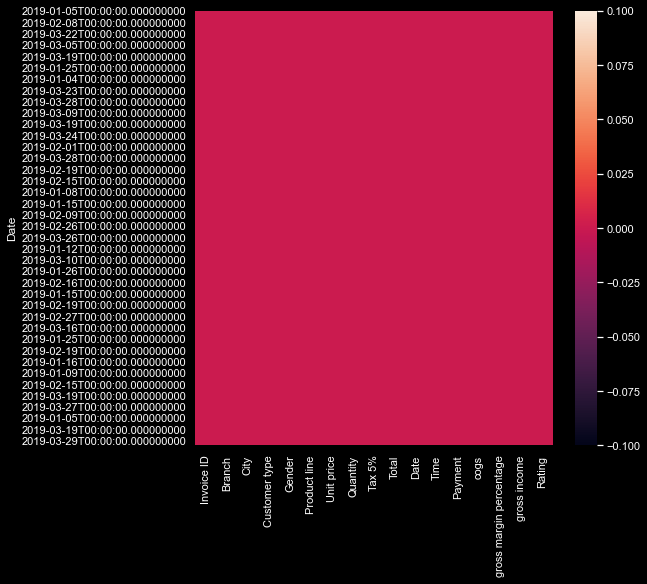

In [5]:
# Checking Missing Values
sns.heatmap(data.isna())

### EDA

In [6]:
### for time series analysis
from statsmodels.tsa.filters.hp_filter import hpfilter  #The Hodrick-Prescott (HP) filter refers to a data-smoothing technique
from statsmodels.tsa.seasonal import seasonal_decompose # ETS (Error, Trend, Seasonal)

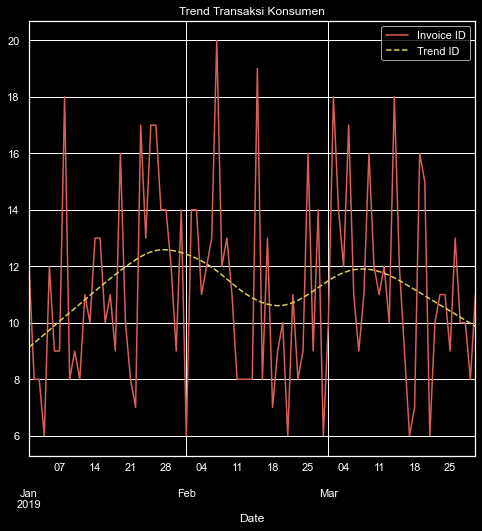

In [7]:
### Time Series Analysis for Number of Transaction
tsa_ID = data['Invoice ID'].copy()
tsa_ID = tsa_ID.groupby('Date').count()
tsa_ID = pd.DataFrame(tsa_ID)
# plot
tsa_ID.plot(kind='line')
plt.title('Trend Transaksi Konsumen')
#tsa_ID_trend
id_cycle, id_trend = hpfilter(tsa_ID)
tsa_ID['Trend ID'] = id_trend
tsa_ID['Trend ID'].plot(style='--')
plt.legend()



Text(0.5, 1.0, 'Seasonal dari Invoice ID')

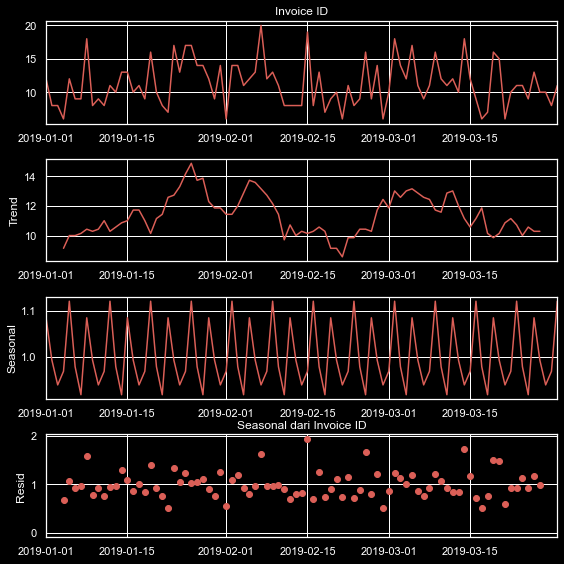

In [8]:
result_id = seasonal_decompose(tsa_ID['Invoice ID'],model='multiplicative')
print(result_id)
result_id.plot();
plt.title('Seasonal dari Invoice ID')



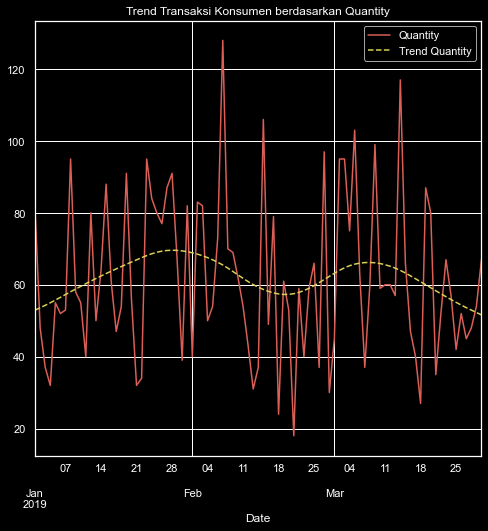

In [9]:
tsa_Quantity = data['Quantity'].copy()
tsa_Quantity = tsa_Quantity.groupby('Date').sum()
tsa_Quantity = pd.DataFrame(tsa_Quantity)
tsa_Quantity.plot(kind='line')

plt.title('Trend Transaksi Konsumen berdasarkan Quantity')
#tsa_Quantity trend
quantity_cycle, quantity_trend = hpfilter(tsa_Quantity)
tsa_Quantity['Trend Quantity'] = quantity_trend
tsa_Quantity['Trend Quantity'].plot(style='--')
plt.legend()


Text(0.5, 1.0, 'Seasonal dari Quantity')

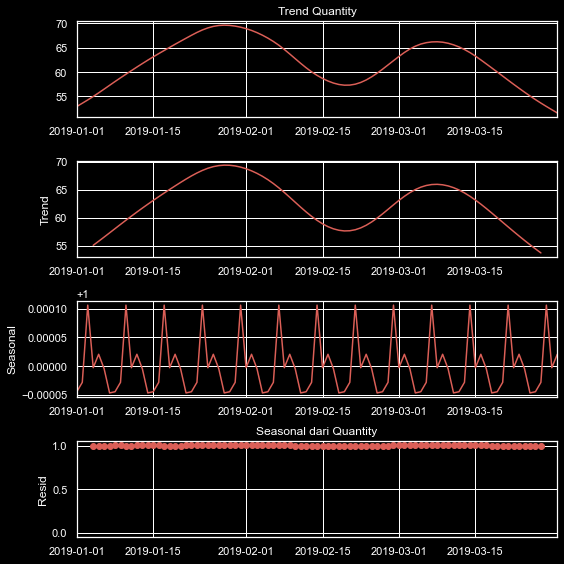

In [10]:
result_Quantity = seasonal_decompose(tsa_Quantity['Trend Quantity'],model='multiplicative')
result_Quantity.plot();
plt.title('Seasonal dari Quantity')

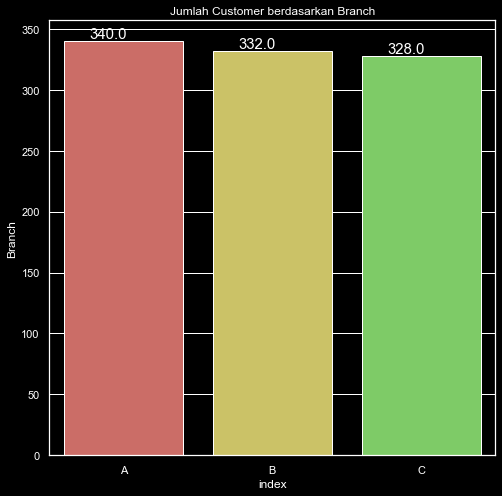

In [11]:
### Branch
df_branch = data.Branch.value_counts()
df_branch = pd.DataFrame(df_branch)
df_branch.reset_index(inplace=True)
ax = sns.barplot(data=df_branch,x='index',y='Branch')
plt.title('Jumlah Customer berdasarkan Branch')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='white', size=15)


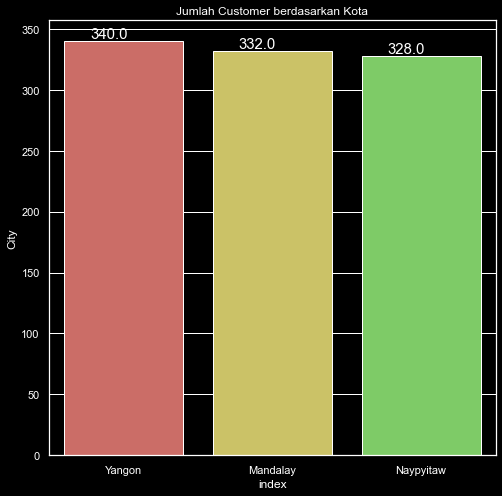

In [12]:
### City 
df_city = data.City.value_counts()
df_city = pd.DataFrame(df_city)
df_city.reset_index(inplace=True)
ax = sns.barplot(data=df_city,x='index',y='City')
plt.title('Jumlah Customer berdasarkan Kota')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='white', size=15)

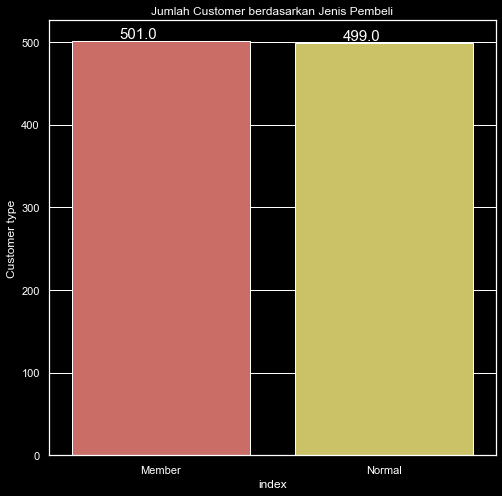

In [13]:
### Customer type
 
df_cus = data['Customer type'].value_counts()
df_cus = pd.DataFrame(df_cus)
df_cus.reset_index(inplace=True)
ax = sns.barplot(data=df_cus,x='index',y='Customer type')
plt.title('Jumlah Customer berdasarkan Jenis Pembeli')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='white', size=15)

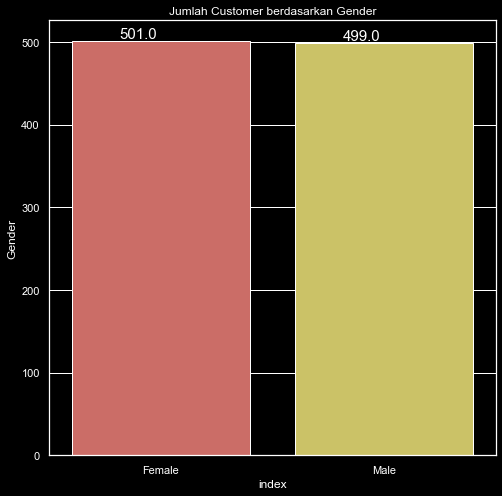

In [14]:
### Gender
df_Gender = data['Gender'].value_counts()
df_Gender = pd.DataFrame(df_Gender)
df_Gender.reset_index(inplace=True)
ax = sns.barplot(data=df_Gender,x='index',y='Gender')
plt.title('Jumlah Customer berdasarkan Gender')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='white', size=15)

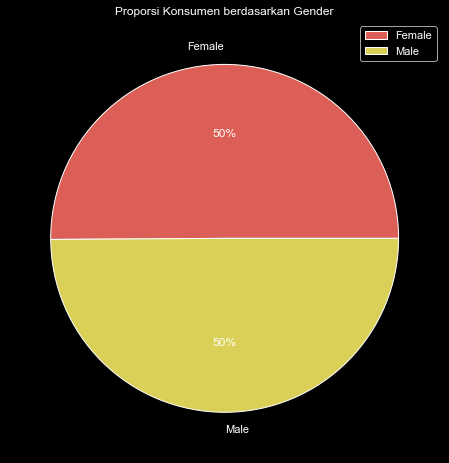

In [15]:
### Gender Pie
data_ = [i for i in data.Gender.value_counts()]
labels = [i for i in data.Gender.unique()]

#create pie chart
plt.pie(data_, labels = labels, autopct='%.00f%%')
plt.title('Proporsi Konsumen berdasarkan Gender')
plt.legend() 
plt.show()

In [16]:
labels

['Female', 'Male']

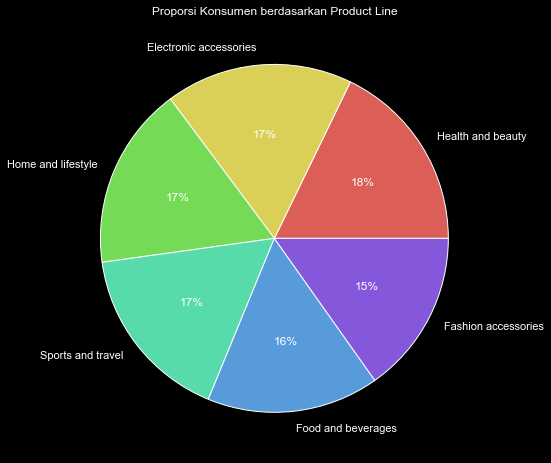

In [17]:
### Product Line
data_ = [i for i in data['Product line'].value_counts()]
labels = [i for i in data['Product line'].unique()]

#create pie chart
plt.pie(data_, labels = labels, autopct='%.00f%%')
plt.title('Proporsi Konsumen berdasarkan Product Line')

plt.show()

In [37]:
data['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

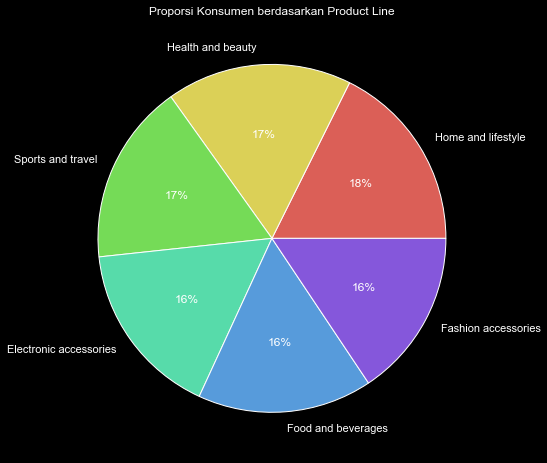

In [18]:
### Analisis Product Line berdasarkan Gender
### Product Line
filt = data[data['Gender']=='Male']
data_ = [i for i in filt['Product line'].value_counts()]
labels = [i for i in filt['Product line'].unique()]

#create pie chart
plt.pie(data_, labels = labels, autopct='%.00f%%')
plt.title('Proporsi Konsumen berdasarkan Product Line')

plt.show()

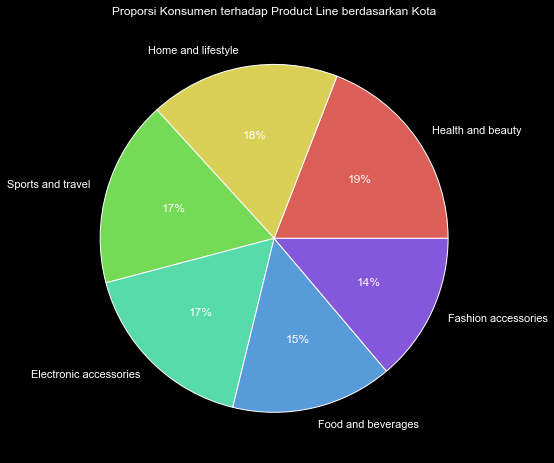

In [19]:
### Analisis Product Line berdasarkan City
filt = data[data['City']=='Yangon']
data_ = [i for i in filt['Product line'].value_counts()]
labels = [i for i in filt['Product line'].unique()]
#create pie chart
plt.pie(data_, labels = labels, autopct='%.00f%%')
plt.title('Proporsi Konsumen terhadap Product Line berdasarkan Kota')
plt.show()

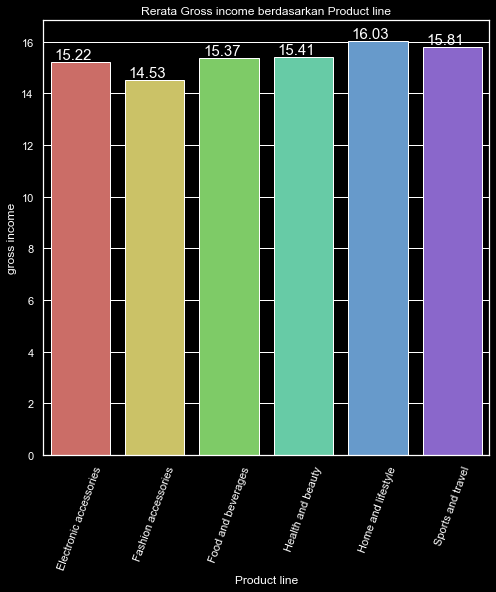

In [36]:
revenue_PL = data.groupby('Product line').mean().round(2).reset_index()
ax = sns.barplot(data=revenue_PL,x='Product line',y='gross income')
plt.title('Rerata Gross income berdasarkan Product line')
plt.xticks(rotation = 70)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='white', size=15)


In [38]:
data['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [40]:
data['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [41]:
data['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64